In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
raw_df = pd.read_csv("DataSet_ARO1_LHT_LC010.CSV", low_memory=False)
raw_df = raw_df.rename(columns={'Unnamed: 0': 'TIME', 'Unnamed: 5': 'TARGET', 'Unnamed: 6': 'CURRENT'})
raw_df = raw_df.iloc[2:-1].reset_index(drop=True)
raw_df = raw_df.iloc[:,1:].astype(np.float32)

### data filtering
env1_normal_indice = (3 < raw_df.loc[:, 'ENV1']) & (raw_df.loc[:, 'ENV1'] < 9)
env3_normal_indice = (6.95 < raw_df.loc[:, 'ENV3']) & (raw_df.loc[:, 'ENV3'] < 7.05)
# target_normal_indice = (29 < raw_df.loc[:, 'TARGET']) & (raw_df.loc[:, 'TARGET'] < 31)
target_normal_indice = (raw_df.loc[:, 'TARGET'] == 30)
current_normal_indice = (24 < raw_df.loc[:, 'CURRENT']) & (raw_df.loc[:, 'CURRENT'] < 35)
agent_normal_indice = (raw_df.loc[:, 'AGENT'] < 40)
reward_normal_indice = (-5 < raw_df.loc[:, 'REWARD']) & (raw_df.loc[:, 'REWARD'] < 5)

selected_bool_indice = env1_normal_indice & env3_normal_indice & target_normal_indice & current_normal_indice & agent_normal_indice & reward_normal_indice

In [8]:
filtered_df = raw_df[selected_bool_indice].astype(np.float32)

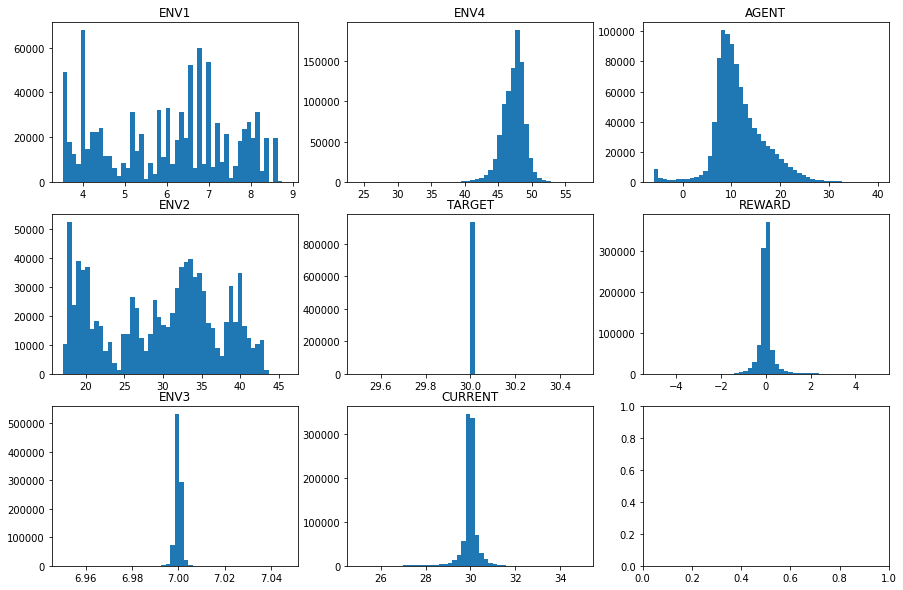

In [19]:
fig, axes = plt.subplots(3,3)

fig.set_figwidth(15)
fig.set_figheight(10)

for cnt, column in enumerate(filtered_df.columns):
    axes[cnt%3, cnt//3].hist(filtered_df.iloc[:, cnt], bins=50)
    axes[cnt%3, cnt//3].set_title(column)

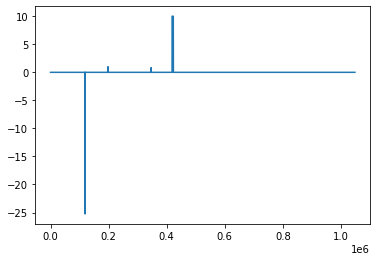

In [30]:
plt.plot((raw_df.loc[:, 'CURRENT'] - 30).round(2) + raw_df.loc[:, 'REWARD'])

In [23]:
raw_df.loc[:, 'REWARD']

0          0.40
1          0.34
2          0.25
3          0.07
4         -0.04
           ... 
1048552    0.01
1048553    0.09
1048554    0.08
1048555    0.10
1048556    0.08
Name: REWARD, Length: 1048557, dtype: float32